In [1]:
## open a terminal console in jupyter
conda activate diffusion_xpu

## Run Text2Image server
python server.py

In [3]:
import requests
import random

PORT=5000

model_ids = [
    "CompVis/stable-diffusion-v1-4",
    "stabilityai/stable-diffusion-2-1",
    "stabilityai/stable-diffusion-xl-base-1.0",
]

print("Available models are:")
for i, model_id in enumerate(model_ids):
    print(f"{i + 1}. {model_id}")

selected_model_index = (
    int(
        input(
            "Select a model by entering its number (or press enter to use the default model): "
        )
    )
    - 1
)
model_id = (
    model_ids[selected_model_index]
    if 0 <= selected_model_index < len(model_ids)
    else model_ids[0]
)
prompt = input("Please enter your prompt: ")
num_images = 0
try:
    num_images = int(input("How many images have to be generated: "))
except Exception:
    num_images = 0
if num_images <= 0:
    num_images = 1

enhancements = [
    "dark",
    "purple light",
    "dreaming",
    "cyberpunk",
    "ancient" ", rustic",
    "gothic",
    "historical",
    "punchy",
    "photo" "vivid colors",
    "4k",
    "bright",
    "exquisite",
    "painting",
    "art",
    "fantasy [,/organic]",
    "detailed",
    "trending in artstation fantasy",
    "electric",
    "night",
]

prompt = prompt + " " + " ".join(random.sample(enhancements, 5))
print(f"Using enhanced prompt: {prompt}")

response = requests.post(
    f'http://localhost:{PORT}/generate_images',  # replace with your server's URL
    json={
        'model_id': model_id,
        'prompt': prompt,
        'num_images': num_images
    }
)

data = response.json()
if data['status'] == 'success':
    print('Image generation successful. Images saved at:', ', '.join(data['image_paths']))
else:
    print('Image generation failed. Error:', data['message'])



Available models are:
1. CompVis/stable-diffusion-v1-4
2. stabilityai/stable-diffusion-2-1
3. stabilityai/stable-diffusion-xl-base-1.0


Select a model by entering its number (or press enter to use the default model):  3
Please enter your prompt:  A jibili palace
How many images have to be generated:  4


Using enhanced prompt: A jibili palace gothic purple light dreaming trending in artstation fantasy art
Image generation failed. Error: 'Image' object has no attribute 'filename'


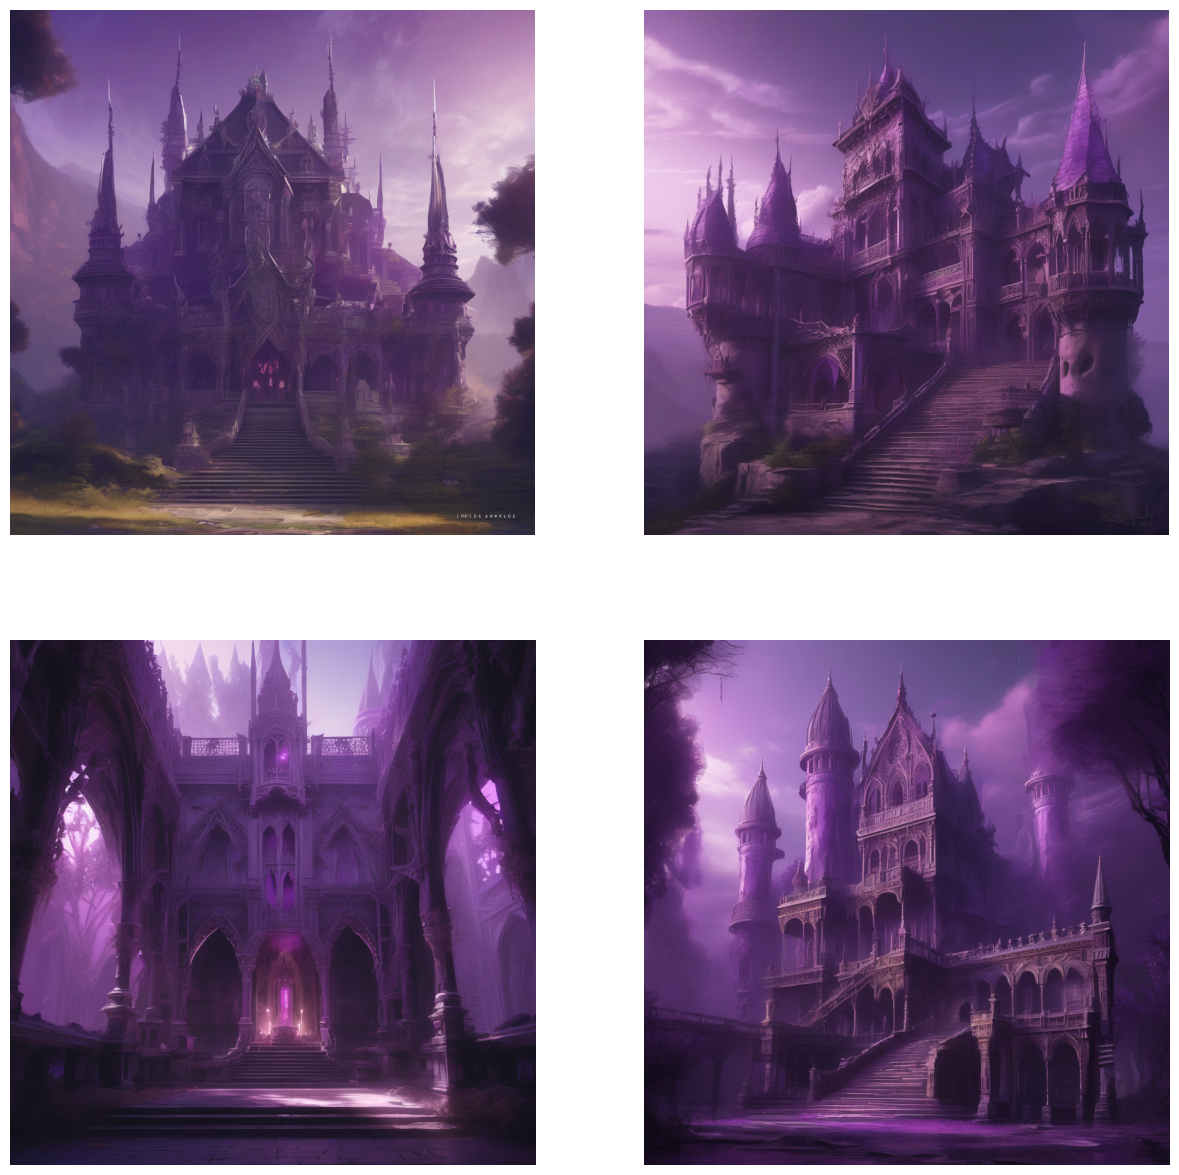

In [4]:
import os
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_images_in_grid(image_dir: str):
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.png') or f.endswith('.jpg')]
    num_images = len(image_files)
    grid_size = math.isqrt(num_images)  # Get the integer square root of the number of images
    if grid_size * grid_size < num_images:
        grid_size += 1
    fig, axs = plt.subplots(nrows=grid_size, ncols=grid_size, figsize=(15, 15))
    row = 0
    col = 0
    for filename in image_files:
        image_path = os.path.join(image_dir, filename)
        img_data = mpimg.imread(image_path)
        axs[row, col].imshow(img_data)
        axs[row, col].axis('off')
        if col < grid_size - 1:
            col += 1
        else:
            col = 0
            row += 1

    for r in range(row, grid_size):
        for c in range(col, grid_size):
            axs[r, c].axis('off')
    plt.show()

image_dir = "./output"
display_images_in_grid(image_dir)

